# Telecom Churn Case Study

### Business objective : To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months

###### Importing libraries

In [339]:
import pandas as pd
import numpy as np
import warnings

from scipy import special 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML


from sklearn.model_selection import train_test_split


sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

warnings.filterwarnings('ignore')

###### Reading Data

In [340]:
tcom_data = pd.read_csv("telecom_churn_data.csv")

In [341]:
# Displaying the first 10 field with all columns in the dataset
tcom_data.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,...,NaN,252.00,252.00,252.00,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.00,0.00,0.00,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,...,NaN,NaN,154.00,50.00,NaN,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.00,0.00,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.00,1.00,NaN,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,...,0.00,NaN,NaN,NaN,46.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.00,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.34,251.10,508.05,389.50,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.00,54.86,44.38,0.00,0.00,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.00,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.64,309.88,238.17,163.43,50.31,149.44,83.89,58.78,76.96,91.88,124.26,45.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.31,149.44,83.89,58.78,67.64,91.88,124.26,37.89,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,117.96,241.33,208.16,98.61,0.00,...,NaN,56.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.00,NaN,NaN,NaN,1526,0.00,0.00,0.00,0.00
5,7000286308,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,50.26,58.81,83.39,170.83,50.16,43.63,85.48,138.79,19.28,13.4

In [342]:
tcom_data.shape

(99999, 226)

In [343]:
tcom_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [344]:
tcom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,...,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",...,"25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,"7,001,207,270.39",109.00,0.00,0.00,0.00,282.99,278.54,279.15,261.65,132.40,133.67,133.02,130.30,197.94,197.05,196.57,190.34,9.95,7.15,7.29,6.34,13.91,9.82,9.97,8.56,47.10,46.47,45.89,44.58,93.34,91.40,91.76,90.46,3.75,3.79,3.68,3.66,1.12,1.37,1.43,1.23,144.20,141.67,141.33,138.71,79.83,83.30,83.28,82.34,87.30,...,0.66,192.60,200.98,197.53,192.73,51.90,51.23,50.17,44.72,121.40,129.00,135.41,136.06,89.56,89.38,91.17,100.26,86.40,85.91,86.60,93.71,0.03,0.02,0.02,0.02,0.08,0.08,0.08,0.07,0.39,0.44,0.45,0.39,0.08,0.08,0.08,0.09,0.07,0.08,0.08,0.08,0.91,0.91,0.89,0.86,"1,219.85",68.17,66.84,60.02,3.30
std,"695,669.39",0.00,0.00,0.00,0.00,328.44,338.16,344.47,342.00,297.21,308.79,308.95,308.48,316.85,325.86,327.17,319.40,72.83,73.45,68.40,57.14,71.44,58.46,64.71,58.44,150.86,155.32,151.18,148.00,162.78,157.49,156.54,158.68,14.23,14.26,13.27,13.46,5.45,7.53,6.78,5.62,251.75,248.73,245.91,245.93,252.48,263.63,265.49,267.18,255.62,...,1.41,192.65,196.79,191.30,188.40,213.36,212.30,212.35,198.65,544.25,541.49,558.78,577.39,193.12,195.89,188.18,216.29,172.77,176.38,168.25,171.38,0.16,0.15,0.14,0.13,0.30,0.30,0.30,0.28,1.50,1.64,1.63,1.35,0.36,0.39,0.38,0.38,0.57,0.63,0.66,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,"7,000,000,074.00",109.00,0.00,0.00,0.00,"-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

###### Checking the overall missing values in the dataset

In [345]:
((tcom_data.isnull().sum()/tcom_data.shape[0])*100).round(2).sort_values(ascending=False)

arpu_3g_6                          74.85
night_pck_user_6                   74.85
total_rech_data_6                  74.85
arpu_2g_6                          74.85
max_rech_data_6                    74.85
                            ...         
max_rech_amt_7                      0.00
max_rech_amt_6                      0.00
total_rech_amt_9                    0.00
total_rech_amt_8                    0.00
sep_vbc_3g                          0.00
Length: 226, dtype: float64

In [346]:
# selecting all the columns with datetime format
date_col= tcom_data.select_dtypes(include=['object'])
print("\nThese are the columns available with datetime format represented as object\n",date_col.columns)

# Converting the selected columns to datetime format
for i in date_col.columns:
    tcom_data[i] = pd.to_datetime(tcom_data[i])

# Current dimension of the dataset
tcom_data.shape


These are the columns available with datetime format represented as object
 Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')


(99999, 226)

###### Handling missing values with respect to data recharge attributes

In [347]:

tcom_data[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.00,252.00
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.00,56.00
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


##### date_of_last_rech_data, total_rech_data, max_rech_data has missing values. These columns represents the the customer has not done any recharge for mobile interenet. Imputing 0 as their values

In [348]:
for i in range(len(tcom_data)):
  # Handling 'total_rech_data', 'max_rech_data' and for month 6
    if pd.isnull((tcom_data['total_rech_data_6'][i]) and (tcom_data['max_rech_data_6'][i])):
        if pd.isnull(tcom_data['date_of_last_rech_data_6'][i]):
            tcom_data['total_rech_data_6'][i]=0
            tcom_data['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 7
    if pd.isnull((tcom_data['total_rech_data_7'][i]) and (tcom_data['max_rech_data_7'][i])):
        if pd.isnull(tcom_data['date_of_last_rech_data_7'][i]):
            tcom_data['total_rech_data_7'][i]=0
            tcom_data['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 8
    if pd.isnull((tcom_data['total_rech_data_8'][i]) and (tcom_data['max_rech_data_8'][i])):
        if pd.isnull(tcom_data['date_of_last_rech_data_8'][i]):
            tcom_data['total_rech_data_8'][i]=0
            tcom_data['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' and for month 9
    if pd.isnull((tcom_data['total_rech_data_9'][i]) and (tcom_data['max_rech_data_9'][i])):
        if pd.isnull(tcom_data['date_of_last_rech_data_9'][i]):
            tcom_data['total_rech_data_9'][i]=0
            tcom_data['max_rech_data_9'][i]=0

In [349]:
tcom_data[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.00,1.00,1.00
1,NaN,NaN,0.00
2,NaN,NaN,0.00
3,NaN,NaN,0.00
4,1.00,0.00,1.00
5,NaN,NaN,0.00
6,NaN,NaN,0.00
7,NaN,NaN,0.00
8,NaN,NaN,0.00
9,NaN,NaN,0.00


##### From the above tabular the column values of total_rech_data for each month from 6 to 9 respectively is the sum of the columns values of count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively, which derives to a multicollinearity issue. In order to reduce the multicollinearity, we can drop the columns count_rech_2g for each month from 6 to 9 respectively and count_rech_3g for each month from 6 to 9 respectively.

In [350]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*' for the months 6,7,8 and 9 
tcom_data.drop(['count_rech_2g_6','count_rech_3g_6',
                   'count_rech_2g_7','count_rech_3g_7',
                   'count_rech_2g_8','count_rech_3g_8',
                   'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


##### Columns with unique value 1 can be dropped as there will not be variance in the model

In [351]:
# lets check the columns unique values and drop such columns with its value as 1
unique_1_col=[]
for i in tcom_data.columns:
    if tcom_data[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass


In [352]:
tcom_data.drop(unique_1_col, axis=1, inplace = True)

In [353]:
tcom_data.shape

(99999, 202)

##### Handling the missing values for the attributes arpu_3g_*,arpu_2g_* for month 6,7,8 and 9

In [354]:
# Checking the related columns values
tcom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.00
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.00
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [355]:
print("Correlation table for month 6\n\n", tcom_data[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", tcom_data[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", tcom_data[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", tcom_data[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                               arpu_3g_6            arpu_2g_6  \
arpu_3g_6                          1.00                 0.93   
arpu_2g_6                          0.93                 1.00   
av_rech_amt_data_6                 0.81                 0.83   

                     av_rech_amt_data_6  
arpu_3g_6                          0.81  
arpu_2g_6                          0.83  
av_rech_amt_data_6                 1.00  

Correlation table for month 7

                               arpu_3g_7            arpu_2g_7  \
arpu_3g_7                          1.00                 0.93   
arpu_2g_7                          0.93                 1.00   
av_rech_amt_data_7                 0.80                 0.82   

                     av_rech_amt_data_7  
arpu_3g_7                          0.80  
arpu_2g_7                          0.82  
av_rech_amt_data_7                 1.00  

Correlation table for month 8

                               arpu_3g_8            a

In [356]:
# Dropping the columns 'arpu_3g_*'&'arpu_2g_*' in month 6,7,8 and 9 datafrom the dataset
tcom_data.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation between their respective arpu_* variable in the dataset



In [357]:
# The curent dimensions of the dataset
tcom_data.shape

(99999, 194)

##### fb_user_* and night_pck_user_* for each month from 6 to 9 respectively has a missing values above 50%. So dropping the columns

In [358]:
tcom_data.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%\n")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it has no meaning to the data snd has high missing values above 50%



In [359]:
tcom_data.shape

(99999, 186)

In [360]:
# Checking the related columns values
tcom_data[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.00,252.00,1.00
1,154.00,154.00,1.00
2,NaN,0.00,0.00
3,NaN,0.00,0.00
4,NaN,0.00,0.00
5,NaN,0.00,0.00
6,NaN,0.00,0.00
7,NaN,0.00,0.00
8,177.00,154.00,2.00
9,154.00,154.00,1.00


##### missing values for the column av_rech_amt_data_* for each month from 6 to 9 can be replaced as 0 if the total_rech_data_* for each month from 6 to 9 respectively is 0. i.e. if the total recharge done is 0 then the average recharge amount shall also be 0.

In [361]:
for i in range(len(tcom_data)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(tcom_data['av_rech_amt_data_6'][i]) and (tcom_data['total_rech_data_6'][i]==0)):
        tcom_data['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(tcom_data['av_rech_amt_data_7'][i]) and (tcom_data['total_rech_data_7'][i]==0)):
        tcom_data['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(tcom_data['av_rech_amt_data_8'][i]) and (tcom_data['total_rech_data_8'][i]==0)):
        tcom_data['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(tcom_data['av_rech_amt_data_9'][i]) and (tcom_data['total_rech_data_9'][i]==0)):
        tcom_data['av_rech_amt_data_9'][i] = 0


In [362]:
# Checkng the overall missing values in the dataset
((tcom_data.isnull().sum()/tcom_data.shape[0])*100).round(2).sort_values(ascending=False)

date_of_last_rech_data_6                  74.85
date_of_last_rech_data_7                  74.43
date_of_last_rech_data_9                  74.08
date_of_last_rech_data_8                  73.66
og_others_9                                7.75
                                   ...         
max_rech_amt_7                             0.00
max_rech_amt_6                             0.00
total_rech_amt_9                           0.00
total_rech_amt_8                           0.00
sep_vbc_3g                                 0.00
Length: 186, dtype: float64

In [363]:
tcom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(144), int64(34)
memory usage: 141.9 MB


##### date_of_last_rech_data_* corresponding to months 6,7,8 and 9 are of no value after the conditional imputation of of columns total_rech_data_*, max_rech_data_*are completes. missing value percentage is high for these columns and can be dropped from the dataset

In [364]:
# Dropping the columns related to datetime dtype from the dataset
tcom_data.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it has no significance to the data



##### we can drop the date_of_last_rech_data_* column corresponding to months 6,7,8 and 9 respectively

In [365]:
# Dropping the columns related to datetime dtype from the dataset
tcom_data.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [366]:
# The curent dimensions of the dataset
tcom_data.shape

(99999, 178)

### 1. Filter high-value customers

In [367]:
# Filtering the data 
 # We are filtering the data in accordance to total revenue generated per customer.

 # first we need the total amount recharge amount done for data alone, we have average rechage amount done. 

 # Calculating the total recharge amount done for data alone in months 6,7,8 and 9
tcom_data['total_rech_amt_data_6']=tcom_data['av_rech_amt_data_6'] * tcom_data['total_rech_data_6']
tcom_data['total_rech_amt_data_7']=tcom_data['av_rech_amt_data_7'] * tcom_data['total_rech_data_7']

# Calculating the overall recharge amount for the months 6,7,8 and 9
tcom_data['overall_rech_amt_6'] = tcom_data['total_rech_amt_data_6'] + tcom_data['total_rech_amt_6']
tcom_data['overall_rech_amt_7'] = tcom_data['total_rech_amt_data_7'] + tcom_data['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
tcom_data['avg_rech_amt_6_7'] = (tcom_data['overall_rech_amt_6'] + tcom_data['overall_rech_amt_7'])/2

# Finding the value of 70th percentage in the overall revenues defining the high value customer creteria for the company
cut_off = tcom_data['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
tcom_data = tcom_data[tcom_data['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [368]:
# Let us check the missing values percentages again for the HVC group
    # Checkng the overall missing values in the dataset
((tcom_data.isnull().sum()/tcom_data.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9                   6.34
spl_og_mou_9                       6.34
loc_og_t2m_mou_9                   6.34
loc_og_t2f_mou_9                   6.34
loc_ic_t2t_mou_9                   6.34
                           ...         
max_rech_amt_8                     0.00
max_rech_amt_7                     0.00
max_rech_amt_6                     0.00
total_rech_amt_9                   0.00
avg_rech_amt_6_7                   0.00
Length: 183, dtype: float64

In [369]:
# Numerical columns available
num_col = tcom_data.select_dtypes(include = ['int64','float64']).columns.tolist()

In [370]:
# Importing the libraries for Scaling and Imputation
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

# Calling the Scaling function
scalar = MinMaxScaler()

# Scaling and transforming the data for the columns that are numerical
tcom_data[num_col]=scalar.fit_transform(tcom_data[num_col])

# Calling the KNN Imputer function
knn=KNNImputer(n_neighbors=3)

# Imputing the NaN values using KNN Imputer

tcom_data_knn = pd.DataFrame(knn.fit_transform(tcom_data[num_col]))
tcom_data_knn.columns=tcom_data[num_col].columns


In [371]:
tcom_data_knn.isnull().sum().sum()

0

In [372]:
# Converting the scaled data back to the original data
tcom_data[num_col]=scalar.inverse_transform(tcom_data_knn)

# Checking the top 10 data
tcom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,"7,000,842,753.00",197.38,214.82,213.80,21.10,53.27,24.61,0.00,33.59,84.23,23.99,0.00,27.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,33.21,79.27,18.20,0.00,24.19,0.40,4.81,0.00,2.69,0.35,0.00,0.00,0.24,132.95,47.64,0.00,60.10,0.00,0.00,0.00,0.38,0.41,0.98,0.00,0.94,0.00,...,252.00,252.00,252.00,0.00,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,252.00,252.00,614.00,504.00,559.00
7,"7,000,701,601.00","1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,65.28,453.43,567.16,325.91,172.05,16.23,33.49,31.64,4.78,23.74,12.59,38.06,7.88,51.39,31.38,40.28,43.38,308.63,447.38,162.28,100.19,62.13,55.14,53.23,4.03,0.00,0.00,0.00,0.00,422.16,533.91,255.79,147.60,4.30,23.29,12.01,21.90,49.89,31.76,49.14,2.53,6.66,...,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,0.00,0.00,"1,580.00",790.00,"1,185.00"
8,"7,001,524,846.00",378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,...,50.00,0.00,10.00,0.00,0.00,2.00,3.00,0.00,0.00,154.00,23.00,0.00,0.00,177.00,69.00,0.00,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0.00,1.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,0.00,0.00,354.00,437.00,955.00,696.00
21,"7,002,124,215.00",514.45,597.75,637.76,578.60,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.00,...,30.00,20.00,50.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00
23,"7,000,887,461.00",74.35,193.90,366.97,811.48,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,15.74,82.

In [373]:
# Checking the overall missing values in the dataset
((tcom_data.isnull().sum()/tcom_data.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number                      0.00
isd_ic_mou_8                       0.00
ic_others_6                        0.00
ic_others_7                        0.00
ic_others_8                        0.00
                           ...         
spl_og_mou_8                       0.00
spl_og_mou_9                       0.00
og_others_6                        0.00
og_others_7                        0.00
avg_rech_amt_6_7                   0.00
Length: 183, dtype: float64

In [374]:
tcom_data.isnull().sum().sum()

0

### 2. Tag churners and remove attributes of the churn phase

##### derive churn variable using total_ic_mou_9,total_og_mou_9,vol_2g_mb_9 and vol_3g_mb_9 attributes

In [375]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
tcom_data[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [376]:
# Initializing the churn variable.
tcom_data['churn']=0

# Imputing the churn values based on the condition
tcom_data['churn'] = np.where(tcom_data[churn_col].sum(axis=1) == 0, 1, 0)

In [377]:
tcom_data.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,...,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,"7,000,842,753.00",197.38,214.82,213.80,21.10,53.27,24.61,0.00,33.59,84.23,23.99,0.00,27.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,33.21,79.27,18.20,0.00,24.19,0.40,4.81,0.00,2.69,0.35,0.00,0.00,0.24,132.95,47.64,0.00,60.10,0.00,0.00,0.00,0.38,0.41,0.98,0.00,0.94,0.00,...,252.00,252.00,0.00,1.00,1.00,1.00,0.00,252.00,252.00,252.00,0.00,252.00,252.00,252.00,0.00,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,968.00,30.40,0.00,101.20,3.58,252.00,252.00,614.00,504.00,559.00,1
7,"7,000,701,601.00","1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,65.28,453.43,567.16,325.91,172.05,16.23,33.49,31.64,4.78,23.74,12.59,38.06,7.88,51.39,31.38,40.28,43.38,308.63,447.38,162.28,100.19,62.13,55.14,53.23,4.03,0.00,0.00,0.00,0.00,422.16,533.91,255.79,147.60,4.30,23.29,12.01,21.90,49.89,31.76,49.14,2.53,6.66,...,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,0.00,0.00,"1,580.00",790.00,"1,185.00",1
8,"7,001,524,846.00",378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,...,0.00,10.00,0.00,0.00,2.00,3.00,0.00,0.00,154.00,23.00,0.00,0.00,177.00,69.00,0.00,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0.00,1.00,0.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,0.00,0.00,354.00,437.00,955.00,696.00,0
21,"7,002,124,215.00",514.45,597.75,637.76,578.60,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.00,...,20.00,50.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,720.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0
23,"7,000,887,461.00",74.35,193.90,366.97,811.48,48.96,50.66,33.58,15.74,85.41,89.36,205.89,111.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,15.74,82.94,83.01,148.56,83.73,0.00,0.

###### Performing EDA for Data Insights

0                  91.86
1                   8.14
Name: churn, dtype: float64


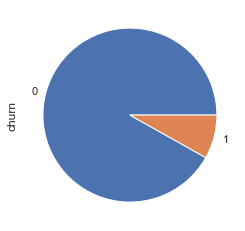

In [378]:
#churn/non churn percentage
print((tcom_data['churn'].value_counts()/len(tcom_data))*100)
((tcom_data['churn'].value_counts()/len(tcom_data))*100).plot(kind="pie")
plt.show()

###### Recharge amount related variables

In [379]:
recharge_amount_columns =  tcom_data.columns[tcom_data.columns.str.contains('rech_amt')]
recharge_amount_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'overall_rech_amt_6',
 'overall_rech_amt_7',
 'avg_rech_amt_6_7']

In [380]:
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = tcom_data
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

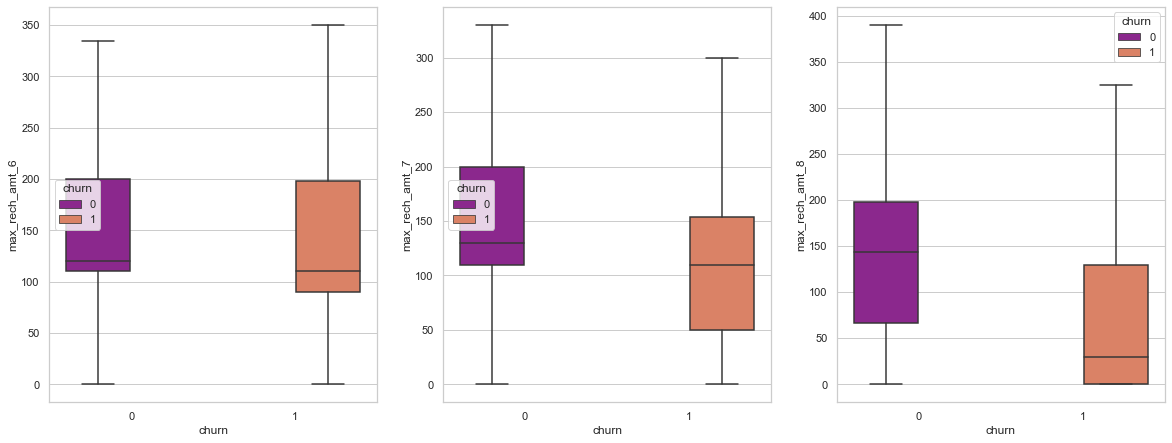

In [381]:
plot_box_chart('max_rech_amt')

###### There is a drop in the max recharge amount for churned customers in the 8th Month (Action Phase)

<AxesSubplot:xlabel='churn', ylabel='avg_rech_amt_6_7'>

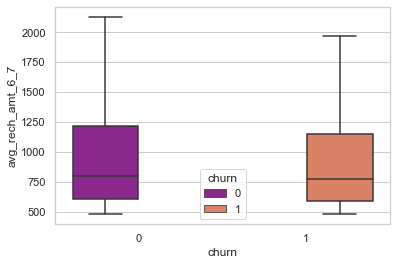

In [382]:
sns.boxplot(data=tcom_data, y='avg_rech_amt_6_7',x="churn",hue="churn",
                showfliers=False,palette=("plasma"))

<AxesSubplot:xlabel='churn', ylabel='av_rech_amt_data_8'>

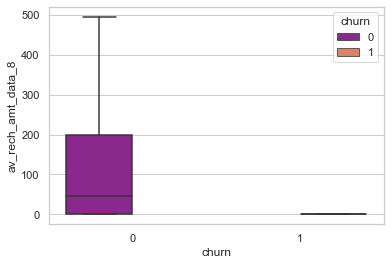

In [383]:
sns.boxplot(data=tcom_data, y='av_rech_amt_data_8',x="churn",hue="churn",
                showfliers=False,palette=("plasma"))

<AxesSubplot:xlabel='churn', ylabel='overall_rech_amt_6'>

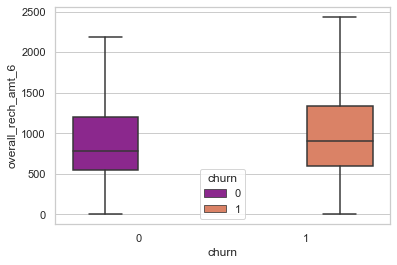

In [384]:
sns.boxplot(data=tcom_data, y='overall_rech_amt_6',x="churn",hue="churn",
                showfliers=False,palette=("plasma"))

<AxesSubplot:xlabel='churn', ylabel='overall_rech_amt_7'>

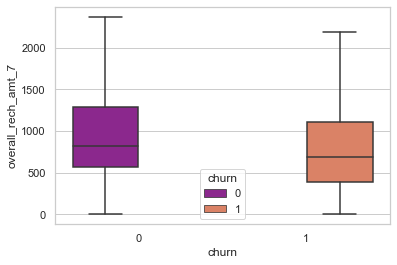

In [385]:
sns.boxplot(data=tcom_data, y='overall_rech_amt_7',x="churn",hue="churn",
                showfliers=False,palette=("plasma"))

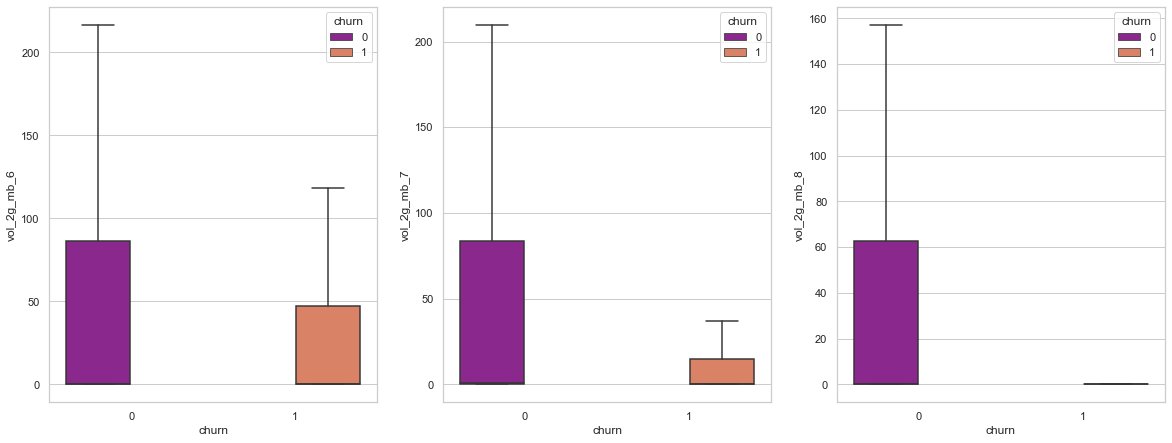

In [386]:
plot_box_chart('vol_2g_mb')

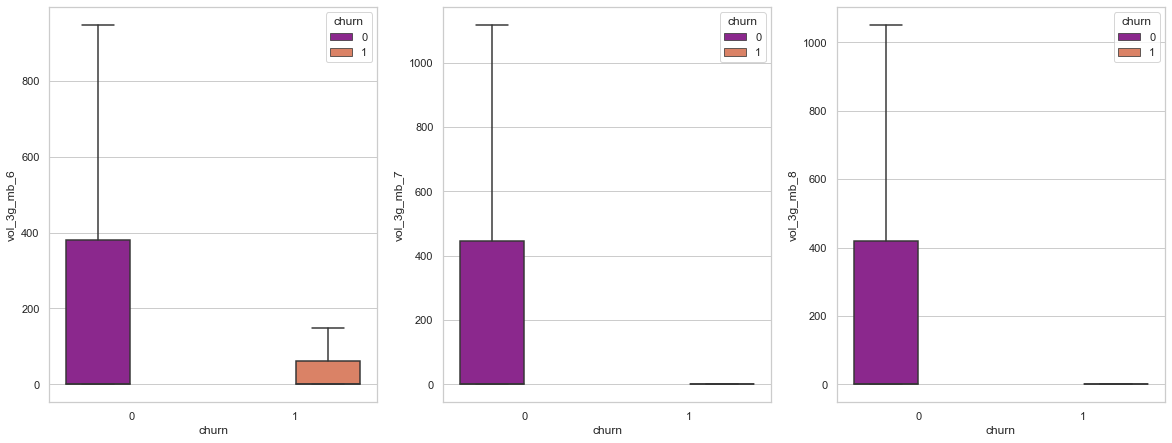

In [387]:
plot_box_chart('vol_3g_mb')

###### 2G and 3G usage for churned customers drops in 8th month

###### It can be observed that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available

In [388]:
def plot_mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [389]:
vbc_column = tcom_data.columns[tcom_data.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

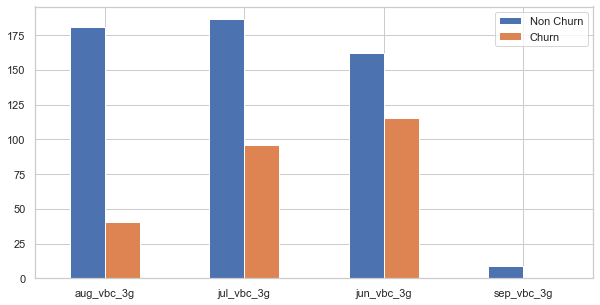

,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
Non Churn,180.50,186.21,162.37,8.71
Churn,40.85,96.08,115.10,0.32


In [390]:
plot_mean_bar_chart(tcom_data, vbc_column)

###### It can be observed that volume-based cost for 3G is much lower for Churned customers as compared to Non-Churned Customers and there is a drop in vbc in 8th month also.


In [391]:
SC_2g_or_3g_col = tcom_data.columns[tcom_data.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

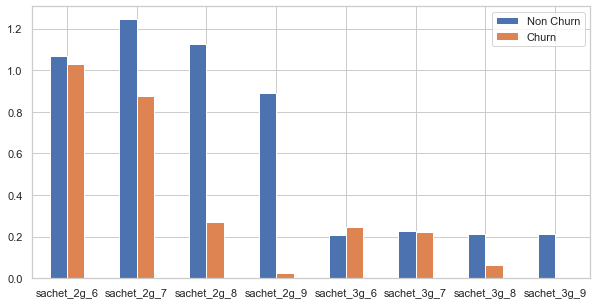

,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9
Non Churn,1.07,1.24,1.12,0.89,0.21,0.23,0.21,0.21
Churn,1.03,0.88,0.27,0.02,0.24,0.22,0.07,0.00


In [392]:
plot_mean_bar_chart(tcom_data, SC_2g_or_3g_col)

###### drop in sachet services in 8th month for churned cutsomers

In [393]:
# Checking columns for average revenue per user
arpu_cols = tcom_data.columns[tcom_data.columns.str.contains('arpu_')]


In [394]:
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_9'], dtype='object')

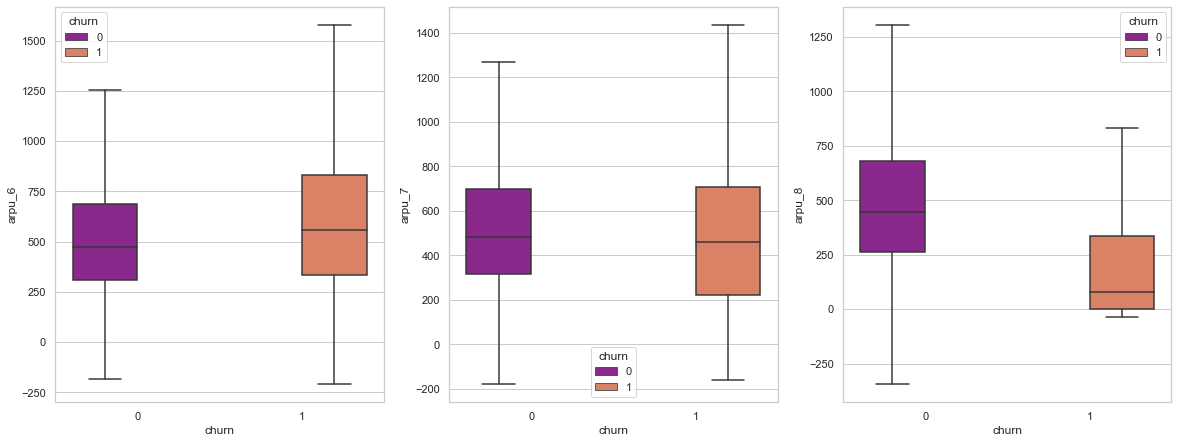

In [396]:
plot_box_chart('arpu')

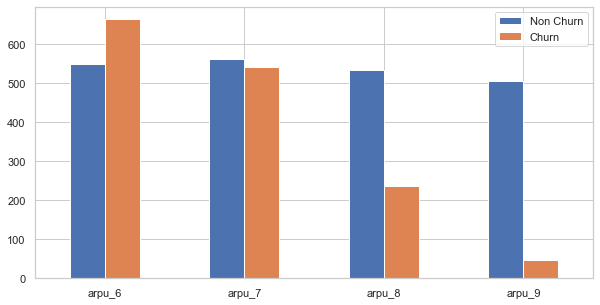

,arpu_6,arpu_7,arpu_8,arpu_9
Non Churn,549.22,562.61,532.64,504.31
Churn,663.16,540.17,237.20,47.32


In [397]:
plot_mean_bar_chart(tcom_data, arpu_cols)

###### there is drop for Arpu in 8th month for churned customers

In [398]:
offnet_usage_service_col = tcom_data.columns[tcom_data.columns.str.contains('offnet.*mou',regex=True)]

In [399]:
offnet_usage_service_col

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'offnet_mou_9'], dtype='object')

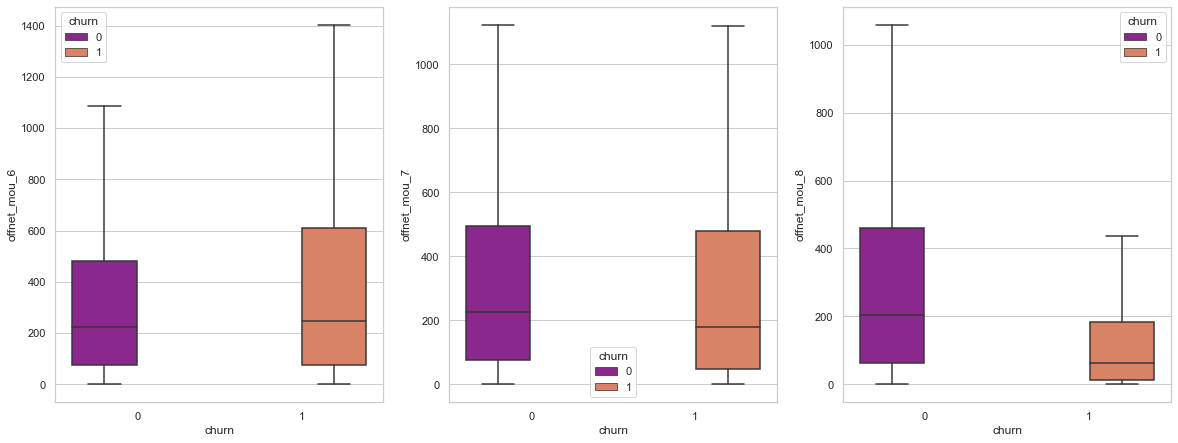

In [400]:
plot_box_chart('offnet_mou')

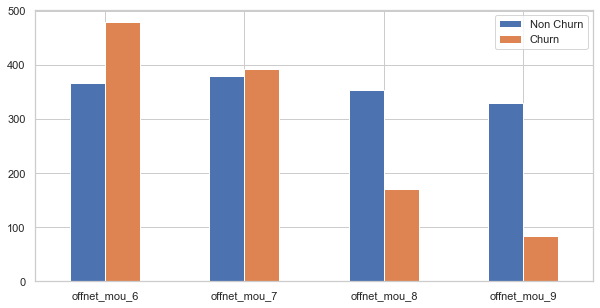

,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9
Non Churn,366.66,378.62,353.52,329.27
Churn,478.35,392.77,171.38,84.54


In [401]:
plot_mean_bar_chart(tcom_data, offnet_usage_service_col)

###### There is a drop for offnet mou services in the 8th month

In [402]:
onnet_usage_service =  tcom_data.columns[tcom_data.columns.str.contains('^onnet.*mou',regex=True)]

In [403]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9'], dtype='object')

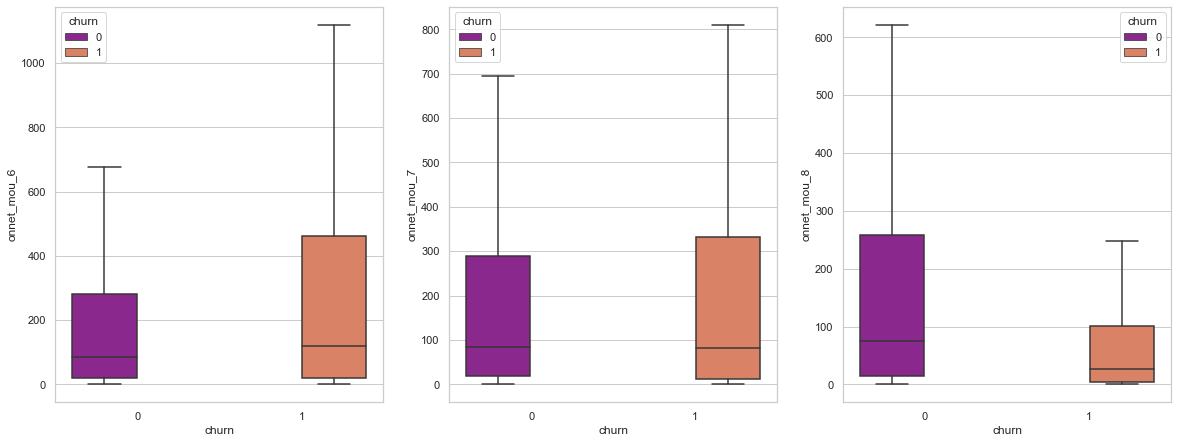

In [404]:
plot_box_chart('onnet_mou')

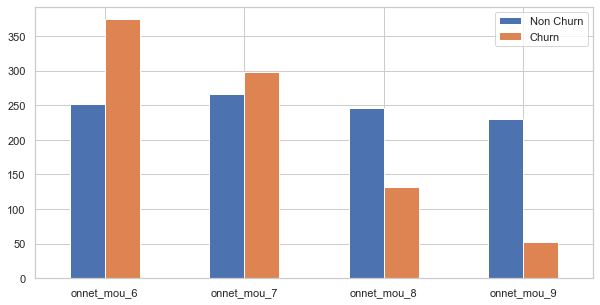

,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9
Non Churn,252.18,266.05,245.44,229.38
Churn,373.80,297.21,131.28,52.88


In [405]:
plot_mean_bar_chart(tcom_data, onnet_usage_service)

###### there is a drop in onnet_usage_Service in the 8th month

#### Proceeding with further data preparation, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [406]:
churn_phase_cols = [col for col in tcom_data.columns if '_9' in col]

In [407]:
# Dropping the selected churn phase columns
tcom_data.drop(churn_phase_cols, axis=1, inplace=True)

# The curent dimension of the dataset after dropping the churn related columns
tcom_data.shape

(30001, 141)

In [408]:
tcom_data.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [409]:
# creating a list of column names for each month
mon_6_cols = [col for col in tcom_data.columns if '_6' in col]
mon_7_cols = [col for col in tcom_data.columns if '_7' in col]
mon_8_cols = [col for col in tcom_data.columns if '_8' in col]

In [410]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
tcom_data_corr = tcom_data.corr()
tcom_data_corr.loc[:,:] = np.tril(tcom_data_corr, k=-1)
tcom_data_corr = tcom_data_corr.stack()
tcom_data_corr
tcom_data_corr[(tcom_data_corr > 0.80) | (tcom_data_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                               0.96
isd_og_mou_8        isd_og_mou_7                         0.94
                    isd_og_mou_6                         0.92
isd_og_mou_7        isd_og_mou_6                         0.92
sachet_2g_8         total_rech_data_8                    0.90
total_ic_mou_6      loc_ic_mou_6                         0.90
total_ic_mou_8      loc_ic_mou_8                         0.89
total_ic_mou_7      loc_ic_mou_7                         0.88
std_og_t2t_mou_8    onnet_mou_8                          0.86
std_og_t2t_mou_7    onnet_mou_7                          0.86
std_og_t2t_mou_6    onnet_mou_6                          0.86
avg_rech_amt_6_7    overall_rech_amt_7                   0.86
std_og_t2m_mou_7    offnet_mou_7                         0.85
std_og_t2m_mou_8    offnet_mou_8                         0.85
total_og_mou_8      std_og_mou_8                         0.85
total_og_mou_7      std_og_mou_7                         0.85
loc_ic_m

In [411]:
col_to_drop=['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
tcom_data.drop(col_to_drop, axis=1, inplace=True)

In [412]:
tcom_data.shape

(30001, 121)

In [413]:
# creating a new variable 'tenure'
tcom_data['tenure'] = (tcom_data['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
tcom_data.drop('aon',axis=1, inplace=True)

In [414]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tcom_data['tenure_range'] = pd.cut(tcom_data['tenure'], tn_range, labels=tn_label)
tcom_data['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

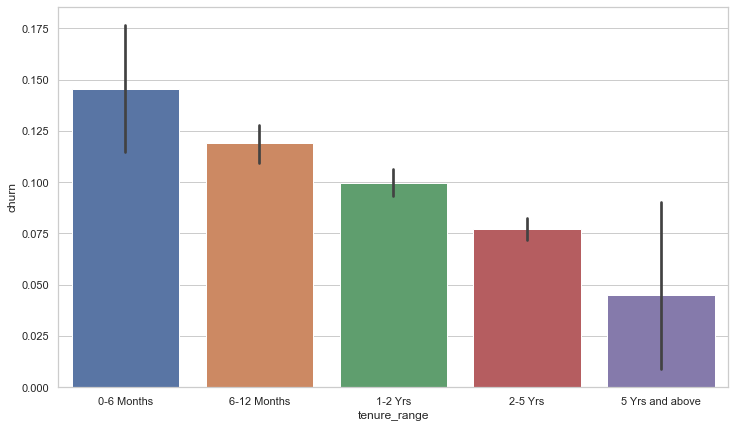

In [415]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=tcom_data)
plt.show()

##### It can be observed that Most Churn happens during the first 6 months. As a customer stays longer with the network, Churn decreases

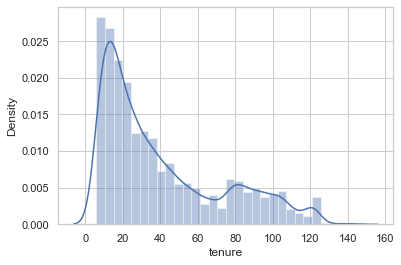

In [416]:
sns.distplot(tcom_data['tenure'],bins=30)
plt.show()

##### The average revenue per user in good phase of customer is given by arpu_6 and arpu_7. since we have two seperate averages, lets take an average to these two and drop the other columns

In [417]:
tcom_data["avg_arpu_6_7"]= (tcom_data['arpu_6']+tcom_data['arpu_7'])/2
tcom_data['avg_arpu_6_7'].head()

0                  206.10
7                1,209.51
8                  435.47
21                 556.10
23                 134.12
Name: avg_arpu_6_7, dtype: float64

In [418]:
tcom_data.drop(['arpu_6','arpu_7'], axis=1, inplace=True)

In [419]:
tcom_data.shape

(30001, 121)

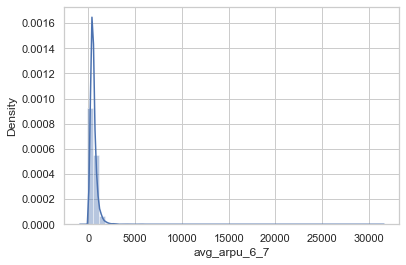

In [420]:
sns.distplot(tcom_data['avg_arpu_6_7'])
plt.show()

Text(0.5, 1.0, 'Features Correlating with Churn variable')

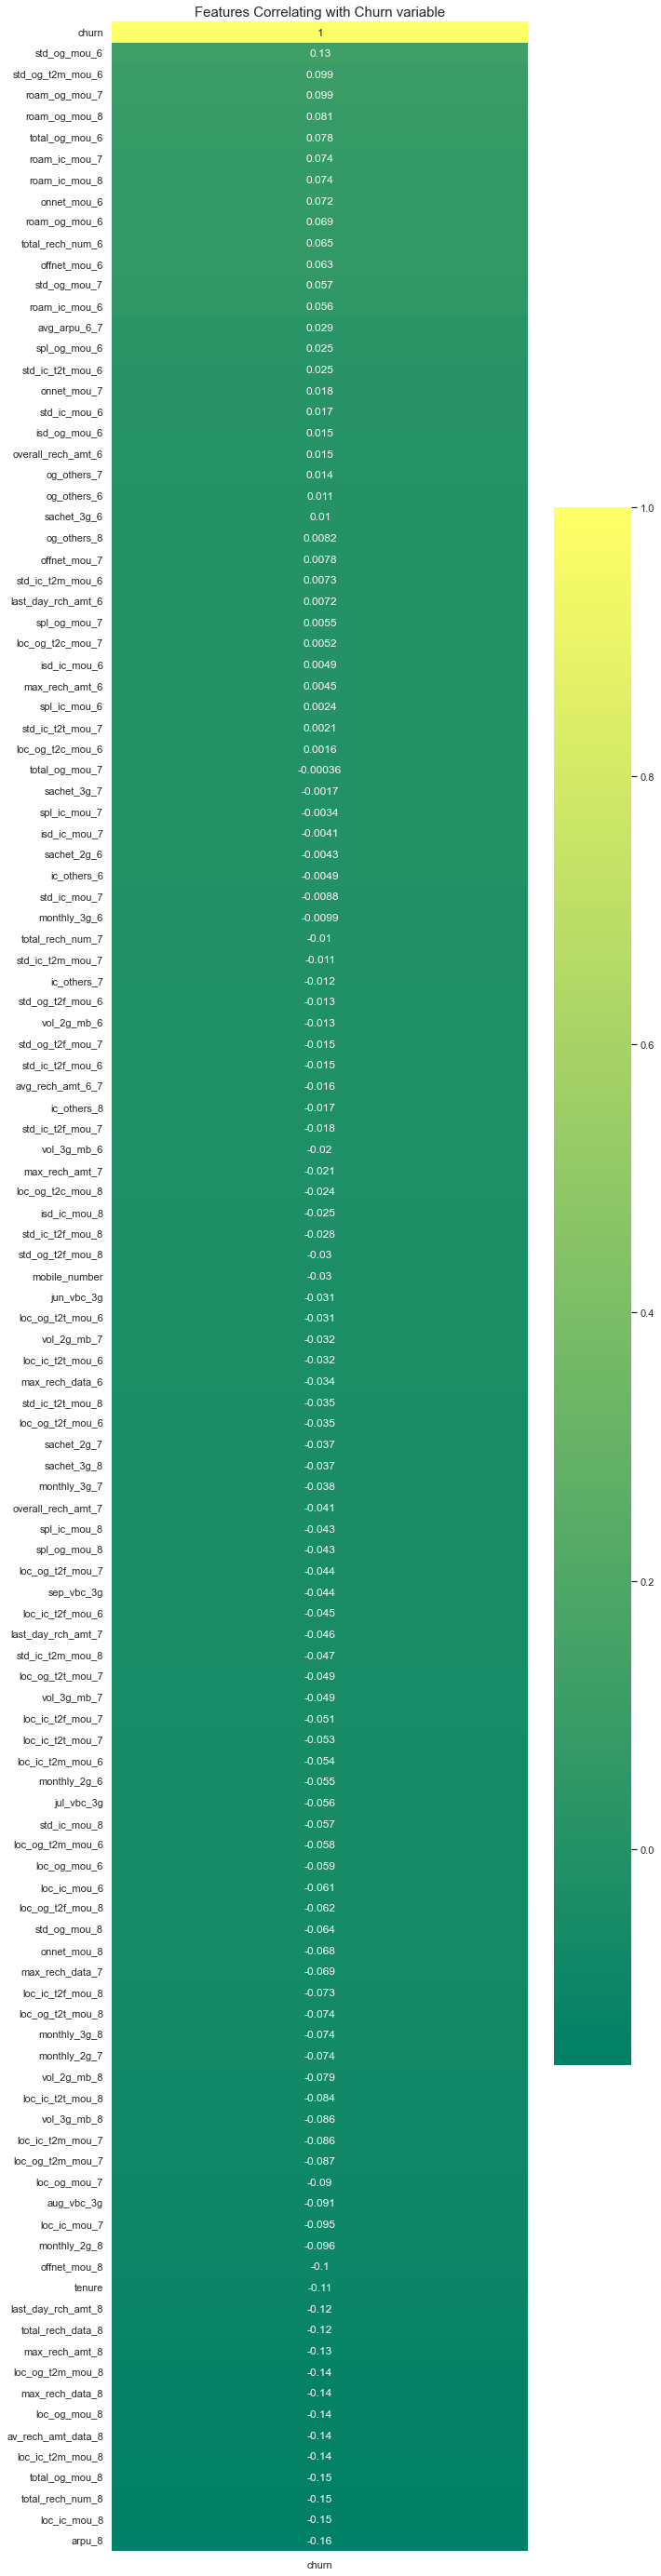

In [421]:
plt.figure(figsize=(10,50))
heatmap_churn = sns.heatmap(tcom_data.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

##### Avg Outgoing Calls & calls on romaning for 6 & 7th months are positively correlated with churn. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

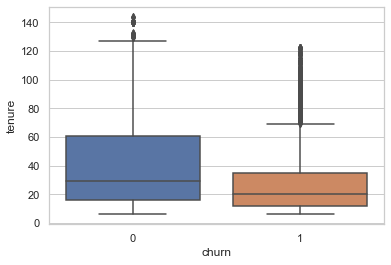

In [422]:
sns.boxplot(x = tcom_data.churn, y = tcom_data.tenure)

plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


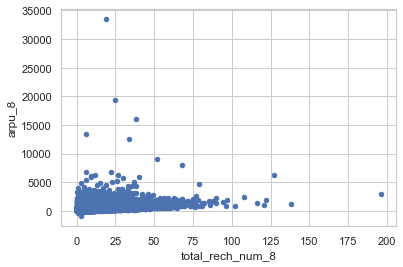

In [423]:
tcom_data[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

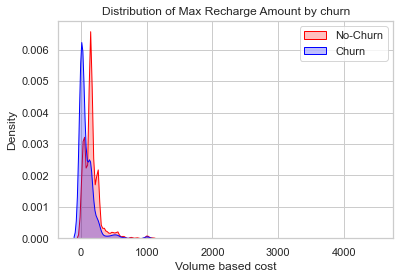

In [424]:
# Plot between churn vs max rechare amount
ax = sns.kdeplot(tcom_data.max_rech_amt_8[(tcom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tcom_data.max_rech_amt_8[(tcom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

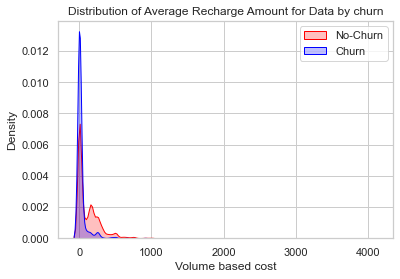

In [425]:
# churn vs max rechare amount
ax = sns.kdeplot(tcom_data.av_rech_amt_data_8[(tcom_data["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(tcom_data.av_rech_amt_data_8[(tcom_data["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

In [426]:
# Creating categories for month 8 column totalrecharge and their count
tcom_data['total_rech_data_group_8']=pd.cut(tcom_data['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
tcom_data['total_rech_num_group_8']=pd.cut(tcom_data['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 <=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: total_rech_data_group_8, dtype: int64


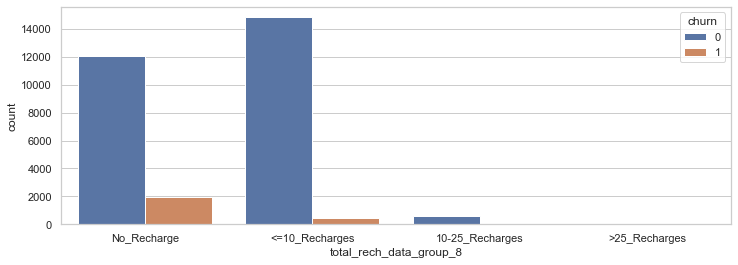

					Distribution of total_rech_num_8 variable
 <=10_Recharges     19349
10-25_Recharges     8073
>25_Recharges       1996
No_Recharge          583
Name: total_rech_num_group_8, dtype: int64


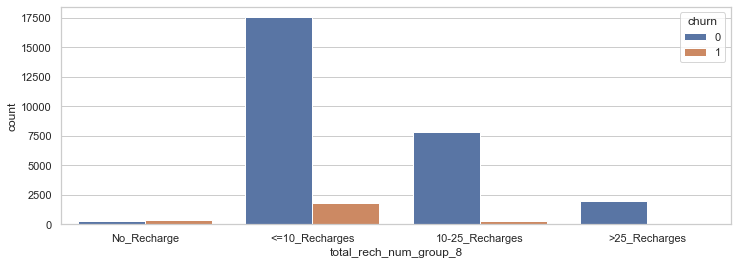

In [427]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=tcom_data,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",tcom_data['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=tcom_data,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",tcom_data['total_rech_num_group_8'].value_counts())
plt.show()

In [428]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(tcom_data[['total_rech_data_group_8','total_rech_num_group_8','tenure_range']], drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [429]:
# Adding the results to the master dataframe
tcom_data = pd.concat([tcom_data, dummy], axis=1)
tcom_data.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,...,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,tenure,tenure_range,avg_arpu_6_7,total_rech_data_group_8,total_rech_num_group_8,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,"7,000,842,753.00",213.80,53.27,24.61,0.00,84.23,23.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,79.27,18.20,0.00,0.40,4.81,0.00,0.35,0.00,0.00,132.95,47.64,0.00,0.41,0.00,0.00,0.00,0.41,0.98,0.00,0.00,4.14,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.49,13.40,0.16,69.18,...,252.00,252.00,252.00,252.00,252.00,1.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,30.40,0.00,101.20,3.58,614.00,504.00,559.00,1,32.00,2-5 Yrs,206.10,<=10_Recharges,<=10_Recharges,1,0,0,1,0,0,0,0,1,0
7,"7,000,701,601.00","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,...,790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,19.38,18.74,0.00,"1,580.00",790.00,"1,185.00",1,27.00,2-5 Yrs,"1,209.51",No_Recharge,<=10_Recharges,0,0,0,1,0,0,0,0,1,0
8,"7,001,524,846.00",137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,...,154.00,30.00,50.00,0.00,10.00,3.00,0.00,154.00,23.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,21.03,910.65,122.16,0.00,437.00,955.00,696.00,0,10.00,6-12 Months,435.47,<=10_Recharges,10-25_Recharges,1,0,0,0,1,0,1,0,0,0
21,"7,002,124,215.00",637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,"1,028.79","1,068.54",2.48,10.19,19.54,118.23,...,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0,24.00,1-2 Yrs,556.10,No_Recharge,>25_Recharges,0,0,0,0,0,1,0,1,0,0
23,"7,000,887,461.00",366.97,48.96,50.66,33.58,85.41,89.36,2

In [430]:
# Creating a copy of the filtered dataframe

df=tcom_data[:].copy()

# Dropping unwanted columns
df.drop(['tenure_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','tenure'], axis=1, inplace=True)

In [431]:
# Cheking the dataset
df.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.80,53.27,24.61,0.00,84.23,23.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,79.27,18.20,0.00,0.40,4.81,0.00,0.35,0.00,0.00,132.95,47.64,0.00,0.41,0.00,0.00,0.00,0.41,0.98,0.00,0.00,4.14,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.49,13.40,0.16,69.18,62.85,...,0.00,4.00,3.00,2.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,30.40,0.00,101.20,614.00,504.00,559.00,1,206.10,1,0,0,1,0,0,0,0,1,0
7,"3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,...,15.14,5.00,5.00,7.00,"1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,19.38,18.74,"1,580.00",790.00,"1,185.00",1,"1,209.51",0,0,0,1,0,0,0,0,1,0
8,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,...,0.00,19.00,21.00,14.00,90.00,154.00,30.00,50.00,0.00,10.00,3.00,0.00,154.00,23.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,21.03,910.65,122.16,437.00,955.00,696.00,0,435.47,1,0,0,0,1,0,1,0,0,0
21,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,"1,028.79","1,068.54",2.48,10.19,19.54,118.23,74.63,...,0.00,22.00,26.00,27.00,50.00,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,0,556.10,0,0,0,0,0,1,0,1,0,0
23,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,2.36,0.00,0.00,0.00

In [432]:
# lets create X dataset for model building.
X = df.drop(['churn'],axis=1)

In [433]:
X.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,213.80,53.27,24.61,0.00,84.23,23.99,0.00,0.00,0.00,0.00,0.00,0.00,0.00,53.27,24.61,0.00,79.27,18.20,0.00,0.40,4.81,0.00,0.35,0.00,0.00,132.95,47.64,0.00,0.41,0.00,0.00,0.00,0.41,0.98,0.00,0.00,4.14,0.33,0.00,0.00,0.00,0.00,0.00,0.00,0.00,44.49,13.40,0.16,69.18,62.85,...,0.55,0.00,4.00,3.00,2.00,252.00,252.00,252.00,252.00,252.00,252.00,1.00,252.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,30.40,0.00,101.20,614.00,504.00,559.00,206.10,1,0,0,1,0,0,0,0,1,0
7,"3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,49.89,6.66,20.08,16.68,60.86,75.14,77.84,0.00,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,...,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.74,19.38,18.74,"1,580.00",790.00,"1,185.00","1,209.51",0,0,0,1,0,0,0,0,1,0
8,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,13.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,...,0.00,0.00,19.00,21.00,14.00,90.00,154.00,30.00,50.00,0.00,10.00,3.00,0.00,154.00,23.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,21.03,910.65,122.16,437.00,955.00,696.00,435.47,1,0,0,0,1,0,1,0,0,0
21,637.76,102.41,132.11,85.14,757.93,896.68,983.39,0.00,0.00,0.00,0.00,0.00,0.00,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.00,0.00,97.04,94.09,129.74,665.36,0.00,0.00,0.00,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,860.34,"1,028.79","1,068.54",2.48,10.19,19.54,118.23,74.63,...,0.00,0.00,22.00,26.00,27.00,50.00,50.00,50.00,30.00,20.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,600.00,680.00,640.00,556.10,0,0,0,0,0,1,0,1,0,0
23,366.97,48.96,50.66,33.58,85.41,89.36,205.89,0.00,0.00,0.00,0.00,0.00,0.00,48.96,50.66,33.58,82.94,83.01,148.56,0.00,0.00,0.00,0.00,0.00,17.71,131.91,133.68,182.14,

In [434]:
y=df['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [435]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


In [436]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 15709 to 99093
Data columns (total 126 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    arpu_8                                   float64
 1    onnet_mou_6                              float64
 2    onnet_mou_7                              float64
 3    onnet_mou_8                              float64
 4    offnet_mou_6                             float64
 5    offnet_mou_7                             float64
 6    offnet_mou_8                             float64
 7    roam_ic_mou_6                            float64
 8    roam_ic_mou_7                            float64
 9    roam_ic_mou_8                            float64
 10   roam_og_mou_6                            float64
 11   roam_og_mou_7                            float64
 12   roam_og_mou_8                            float64
 13   loc_og_t2t_mou_6                         float64
 14   

In [437]:
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [438]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [439]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
15709,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.00,0.00,0.01,0.05,0.02,0.04,0.04,0.03,0.04,0.04,0.03,0.02,0.10,0.10,0.10,0.04,0.00,0.03,0.02,0.00,0.00,0.00,0.25,0.25,0.20,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.06,1,0,0,1,0,0,0,0,0,0
28202,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.04,0.02,...,0.00,0.00,0.06,0.11,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.02,0.02,0.02,0.03,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.08,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.07,1,0,0,1,0,0,0,0,1,0
14943,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.04,0.03,...,0.00,0.00,0.06,0.11,0.06,0.01,0.04,0.00,0.00,0.04,0.00,0.04,0.02,0.10,0.01,0.01,0.07,0.09,0.05,0.00,0.00,0.00,0.00,0.50,0.00,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.02,0.07,1,0,0,0,1,0,1,0,0,0
92007,0.08,0.16,0.11,0.05,0.14,0.18,0.05,0.00,0.03,0.00,0.00,0.38,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.14,0.00,0.00,0.00,0.27,0.16,0.08,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.23,0.16,0.09,0.01,0.00,0.01,0.01,0.01,...,0.00,0.00,0.02,0.07,0.03,0.14,0.08,0.09,0.14,0.08,0.09,0.02,0.00,0.16,0.16,0.06,0.00,0.09,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00,0.01,0.21,0.00,0.01,0.04,0.02,0.15,1,0,0,1,0,0,0,0,1,0
56403,0.04,0.08,0.05,0.00,0.06,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.06,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.07,0.01,0.02,0.02,0.00,0.00,0.07,0.03,0.00,0.00,0.03,0.03,0.01,0.07,0.00,0.00,0.10,0.08,0.01,0.00,0.00,0.00,0.04,0.11,...,0.00,0.00,0.06,0.12,0.06,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

#### since the rate of churn is typically low (about 5-10%, this is called class-imbalance) - using SMOTE technique to handle class imbalance

##### Handling Data Imbalance

In [440]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [441]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


### Logistic Regression

In [442]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [443]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13899.
Date:                Tue, 17 Jan 2023   Deviance:                       27799.
Time:                        09:59:28   Pearson chi2:                 2.47e+14
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.0696      0.152      7.047      0.000       0.772       1.367
arpu_8                                      4.7856      1.723      2.778      0.005       1.409       8.162
onnet_mou_6                               -51.0284     28.728     -1.776      0.076    -107.334       5.277
onnet_mou_7                                58.2211     16.328      3.566      0.000      26.219      90.223
onnet_mou_8                               181.4642     24.155      7.512      0.000     134.121     228.808
offnet_mou_6                              -47.8873     32.389     -1.478      0.139    -111.369      15.595
offnet_mou_7                               71.5234     19.306      3.705      0.000      33.685     109.362
offnet_mou_8                              232.4307     31.431      7.395      0.000     170.828     294.034
roam_ic_mou_6                               3.0054      0.846      3.552      0.000       1.347       4.664
roam_ic_mou_7                               5.1800      1.574      3.291      0.001       2.095       8.264
roam_ic_mou_8                              -1.5652      0.802     -1.951      0.051      -3.137       0.007
roam_og_mou_6                              21.8397     14.678      1.488      0.137      -6.929      50.608
roam_og_mou_7                             -12.2597      3.827     -3.204      0.001     -19.760      -4.760
roam_og_mou_8                             -55.8880      7.814     -7.152      0.000     -71.204     -40.572
loc_og_t2t_mou_6                        -6949.0231   1.98e+04     -0.352      0.725   -4.57e+04    3.18e+04
loc_og_t2t_mou_7                        -1.823e+04   2.28e+04     -0.800      0.424   -6.29e+04    2.64e+04
loc_og_t2t_mou_8                          1.93e+05   3.41e+04      5.662      0.000    1.26e+05     2.6e+05
loc_og_t2m_mou_6                        -5118.5008   1.45e+04     -0.352      0.725   -3.36e+04    2.34e+04
loc_og_t2m_mou_7                        -1.099e+04   1.37e+04     -0.800      0.424   -3.79e+04    1.59e+04
loc_og_t2m_mou_8                         6.367e+04   1.12e+04      5.662      0.000    4.16e+04    8.57e+04
loc_og_t2f_mou_6                         -729.5996   2078.354     -0.351      0.726   -4803.099    3343.899
loc_og_t2f_mou_7                        -2621.4568   3259.262     -0.804      0.421   -9009.494    3766.580
loc_og_t2f_mou_8                         1.667e+04   2943.494      5.663      0.000    1.09e+04    2.24e+04
loc_og_t2c_mou_6                           -5.0018      1.067     -4.687      0.000      -7.093      -2.910
loc_og_t2c_mou_7                            0.2132      1.861      0.115      0.909      -3.434       3.860
loc_og_t2c_mou_8                            0.3721      1.2

##### Using RFE

In [444]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, step = 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [445]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False, False, False,
        True, False, False,  True,  True, False,  True, False,  True,
       False, False, False,  True, False, False, False, False,  True,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True, False, False,  True,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True,  True,
       False,  True, False, False, False, False, False,  True, False,
        True, False,  True,  True,  True, False, False, False, False])

In [446]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_7',
       'isd_og_mou_6', 'og_others_6', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_7',
       'total_rech_num_7', 'total_rech_num_8', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'max_rech_data_6'

In [447]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 2),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', True, 1),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', False, 3),
 ('roam_og_mou_6', False, 4),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 3),
 ('loc_og_t2t_mou_7', False, 5),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 4),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 5),
 ('loc_og_t2f_mou_7', True, 1),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', True, 1),
 ('loc_og_t2c_mou_7', False, 3),
 ('loc_og_t2c_mou_8', False, 5),
 ('loc_og_mou_6', False, 2),
 ('loc_og_mou_7', False, 5),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 5),
 ('std_og_t2f_mou_6', False, 5),
 ('std_og_t2f_mou_7', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('std_og_mou_6', False, 2),


In [448]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38512
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14194.
Date:                Tue, 17 Jan 2023   Deviance:                       28388.
Time:                        09:59:33   Pearson chi2:                 5.90e+14
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.1229      0.120      9.333      0.000       0.887       1.359
arpu_8                                      6.9230      1.429      4.846      0.000       4.123       9.723
onnet_mou_6                                 1.5007      0.421      3.566      0.000       0.676       2.326
onnet_mou_7                                 6.7826      1.185      5.723      0.000       4.460       9.105
onnet_mou_8                               271.6300      9.170     29.623      0.000     253.658     289.602
offnet_mou_7                               10.6229      1.345      7.900      0.000       7.987      13.258
offnet_mou_8                              350.9322     11.946     29.377      0.000     327.519     374.345
roam_ic_mou_6                               1.7079      0.654      2.612      0.009       0.426       2.989
roam_ic_mou_7                               6.2402      1.386      4.501      0.000       3.523       8.958
roam_og_mou_7                              -0.3437      0.518     -0.663      0.507      -1.360       0.672
roam_og_mou_8                             -86.3643      3.083    -28.013      0.000     -92.407     -80.322
loc_og_t2t_mou_8                         2.068e+05   3.27e+04      6.324      0.000    1.43e+05    2.71e+05
loc_og_t2m_mou_8                         6.822e+04   1.08e+04      6.324      0.000    4.71e+04    8.94e+04
loc_og_t2f_mou_7                          -10.9591      2.335     -4.693      0.000     -15.536      -6.383
loc_og_t2f_mou_8                         1.786e+04   2823.910      6.326      0.000    1.23e+04    2.34e+04
loc_og_t2c_mou_6                           -4.0299      0.883     -4.562      0.000      -5.761      -2.299
loc_og_mou_8                            -2.124e+05   3.36e+04     -6.325      0.000   -2.78e+05   -1.47e+05
std_og_t2f_mou_7                            0.5927      1.631      0.363      0.716      -2.604       3.790
std_og_t2f_mou_8                           -9.2857      2.558     -3.630      0.000     -14.300      -4.271
std_og_mou_7                               -5.1390      1.509     -3.406      0.001      -8.096      -2.182
isd_og_mou_6                               -0.2433      1.240     -0.196      0.844      -2.674       2.187
og_others_6                                -2.3866      0.629     -3.796      0.000      -3.619      -1.154
total_og_mou_8                           -367.6499     11.993    -30.656      0.000    -391.155    -344.145
loc_ic_t2t_mou_8                         1.508e+05   1.15e+04     13.091      0.000    1.28e+05    1.73e+05
loc_ic_t2m_mou_6                            0.4189      1.444      0.290      0.772      -2.411       3.249
loc_ic_t2m_mou_7                            9.0736      1.0

In [449]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2t_mou_8' as it has high p-value of 0.80
rfe_columns_1=rfe_columns.drop('loc_ic_t2t_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_1)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_7',
       'isd_og_mou_6', 'og_others_6', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_8', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_7', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_6', 'av_rech_amt_data_8',
       'vol_2g_

In [450]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_1])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38513
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14280.
Date:                Tue, 17 Jan 2023   Deviance:                       28559.
Time:                        09:59:34   Pearson chi2:                 6.76e+14
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.9817      0.120      8.207      0.000       0.747       1.216
arpu_8                                      6.5827      1.418      4.643      0.000       3.804       9.362
onnet_mou_6                                 1.6935      0.418      4.047      0.000       0.873       2.514
onnet_mou_7                                 6.6819      1.194      5.595      0.000       4.341       9.023
onnet_mou_8                               271.6244      9.242     29.389      0.000     253.509     289.739
offnet_mou_7                               10.2702      1.353      7.591      0.000       7.619      12.922
offnet_mou_8                              351.2626     12.041     29.171      0.000     327.662     374.863
roam_ic_mou_6                               1.6151      0.649      2.487      0.013       0.342       2.888
roam_ic_mou_7                               6.7035      1.393      4.811      0.000       3.973       9.434
roam_og_mou_7                              -0.1065      0.519     -0.205      0.838      -1.124       0.911
roam_og_mou_8                             -86.1024      3.103    -27.745      0.000     -92.185     -80.020
loc_og_t2t_mou_8                         3.001e+05   3.19e+04      9.398      0.000    2.38e+05    3.63e+05
loc_og_t2m_mou_8                         9.901e+04   1.05e+04      9.398      0.000    7.84e+04     1.2e+05
loc_og_t2f_mou_7                          -11.6732      2.395     -4.874      0.000     -16.367      -6.979
loc_og_t2f_mou_8                         2.592e+04   2757.896      9.400      0.000    2.05e+04    3.13e+04
loc_og_t2c_mou_6                           -4.1398      0.880     -4.705      0.000      -5.864      -2.415
loc_og_mou_8                            -3.082e+05   3.28e+04     -9.398      0.000   -3.72e+05   -2.44e+05
std_og_t2f_mou_7                            0.5373      1.650      0.326      0.745      -2.698       3.772
std_og_t2f_mou_8                           -9.7871      2.591     -3.778      0.000     -14.865      -4.709
std_og_mou_7                               -4.7011      1.520     -3.093      0.002      -7.681      -1.722
isd_og_mou_6                                0.0758      1.224      0.062      0.951      -2.324       2.476
og_others_6                                -2.2078      0.623     -3.545      0.000      -3.428      -0.987
total_og_mou_8                           -368.3126     12.084    -30.478      0.000    -391.998    -344.628
loc_ic_t2m_mou_6                            0.3522      1.457      0.242      0.809      -2.503       3.207
loc_ic_t2m_mou_7                            9.2637      1.048      8.837      0.000       7.209      11.318
loc_ic_t2m_mou_8                          -13.9843      2.8

In [451]:
# From the p-value of the individual columns, 
    # we can drop the column 'loc_ic_t2m_mou_8' as it has high p-value of 0.80
rfe_columns_2=rfe_columns_1.drop('loc_ic_t2m_mou_8',1)
print("\nThe new set of edited featured are:\n",rfe_columns_2)


The new set of edited featured are:
 Index(['arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_7',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_mou_8', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_7',
       'isd_og_mou_6', 'og_others_6', 'total_og_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_8', 'spl_ic_mou_8',
       'isd_ic_mou_7', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_amt_7', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'total_rech_data_8', 'max_rech_data_6', 'av_rech_amt_data_8',
       'vol_2g_mb_6', 'vol_2g_mb_7'

In [452]:
# Training the model with the edited feature list
X_train_SM = sm.add_constant(X_train_sm[rfe_columns_2])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38514
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14291.
Date:                Tue, 17 Jan 2023   Deviance:                       28583.
Time:                        09:59:34   Pearson chi2:                 6.75e+14
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.9776      0.120      8.148      0.000       0.742       1.213
arpu_8                                      6.8107      1.425      4.779      0.000       4.017       9.604
onnet_mou_6                                 1.6247      0.418      3.890      0.000       0.806       2.443
onnet_mou_7                                 6.8976      1.191      5.790      0.000       4.563       9.233
onnet_mou_8                               271.4778      9.247     29.357      0.000     253.353     289.602
offnet_mou_7                               10.6253      1.349      7.876      0.000       7.981      13.270
offnet_mou_8                              350.7367     12.048     29.112      0.000     327.123     374.350
roam_ic_mou_6                               1.6587      0.651      2.548      0.011       0.383       2.934
roam_ic_mou_7                               6.5316      1.390      4.700      0.000       3.808       9.255
roam_og_mou_7                              -0.1785      0.519     -0.344      0.731      -1.195       0.838
roam_og_mou_8                             -85.9276      3.106    -27.667      0.000     -92.015     -79.840
loc_og_t2t_mou_8                         2.994e+05   3.19e+04      9.377      0.000    2.37e+05    3.62e+05
loc_og_t2m_mou_8                         9.876e+04   1.05e+04      9.377      0.000    7.81e+04    1.19e+05
loc_og_t2f_mou_7                          -11.7064      2.392     -4.894      0.000     -16.395      -7.018
loc_og_t2f_mou_8                         2.586e+04   2756.872      9.379      0.000    2.05e+04    3.13e+04
loc_og_t2c_mou_6                           -4.0829      0.880     -4.640      0.000      -5.807      -2.358
loc_og_mou_8                            -3.074e+05   3.28e+04     -9.378      0.000   -3.72e+05   -2.43e+05
std_og_t2f_mou_7                            0.6746      1.646      0.410      0.682      -2.551       3.900
std_og_t2f_mou_8                           -9.9990      2.603     -3.841      0.000     -15.101      -4.897
std_og_mou_7                               -4.9860      1.517     -3.286      0.001      -7.960      -2.012
isd_og_mou_6                                0.1530      1.235      0.124      0.901      -2.268       2.574
og_others_6                                -2.1889      0.622     -3.520      0.000      -3.408      -0.970
total_og_mou_8                           -367.9836     12.092    -30.432      0.000    -391.684    -344.284
loc_ic_t2m_mou_6                           -1.8895      1.418     -1.332      0.183      -4.669       0.890
loc_ic_t2m_mou_7                            7.9488      1.002      7.932      0.000       5.985       9.913
loc_ic_t2f_mou_8                            4.5818      1.7

In [453]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([7.88041815e-02, 4.57440265e-01, 2.49750051e-01, 4.73583774e-01,
       5.42736465e-01, 5.70516016e-01, 1.02756076e-05, 2.86585198e-01,
       1.17741139e-02, 7.30197758e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [454]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,0,0.08
1,0,0.46
2,0,0.25
3,0,0.47
4,0,0.54


In [455]:
##### Creating new column 'churn_pred' with 1 if Churn_Prob > 0.5 else 0

In [456]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,0,0.08,0
1,0,0.46,0
2,0,0.25,0
3,0,0.47,0
4,0,0.54,1


##### Confusion matrix 

In [457]:
from sklearn import metrics


confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[16235  3053]
 [ 2675 16613]]


In [458]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.851513894649523


In [459]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [460]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns_2].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,loc_og_mou_8,"4,467,969,802.18"
28,std_ic_t2t_mou_8,"3,087,915,452.83"
11,loc_og_t2m_mou_8,"1,885,835,911.15"
25,loc_ic_mou_6,"1,410,797,831.79"
10,loc_og_t2t_mou_8,"1,338,654,629.80"
...,...,...
19,isd_og_mou_6,1.28
20,og_others_6,1.23
14,loc_og_t2c_mou_6,1.11
38,total_rech_num_7,1.07


In [461]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [462]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8613127333056823
Specificity =  0.8417150559933637
False Positive Rate =  0.15828494400663626
Precision =  0.8447574494050646
True Negative Prediction Rate =  0.8585404547858276


##### Plotting the ROC Curve

In [463]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [464]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

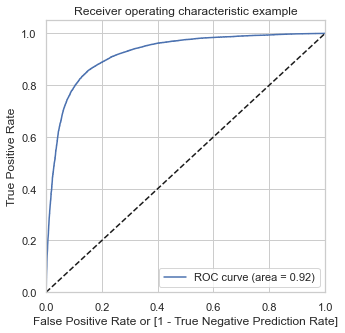

In [465]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

In [466]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.08,0,1,0,0,0,0,0,0,0,0,0
1,0,0.46,0,1,1,1,1,1,0,0,0,0,0
2,0,0.25,0,1,1,1,0,0,0,0,0,0,0
3,0,0.47,0,1,1,1,1,1,0,0,0,0,0
4,0,0.54,1,1,1,1,1,1,1,0,0,0,0


In [467]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.71                 0.98   
0.20                 0.20                 0.78                 0.96   
0.30                 0.30                 0.82                 0.94   
0.40                 0.40                 0.84                 0.90   
0.50                 0.50                 0.85                 0.86   
0.60                 0.60                 0.85                 0.81   
0.70                 0.70                 0.83                 0.73   
0.80                 0.80                 0.78                 0.61   
0.90                 0.90                 0.67                 0.36   

              specificity  
0.00                 0.00  
0.10                 0.44  
0.20                 0.59  
0.30                 0.70  
0.40                 0.78  
0.50                 0.84  
0.60                 0

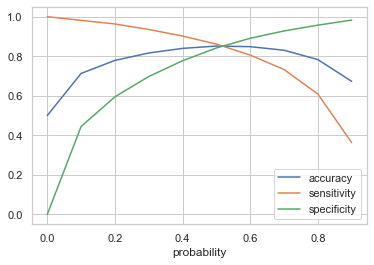

In [468]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [469]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59
0,0,0.08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.46,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.25,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.47,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.54,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0


In [470]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.50                 0.50                 0.85                 0.86   
0.51                 0.51                 0.85                 0.86   
0.52                 0.52                 0.85                 0.85   
0.53                 0.53                 0.85                 0.85   
0.54                 0.54                 0.85                 0.84   
0.55                 0.55                 0.85                 0.84   
0.56                 0.56                 0.85                 0.83   
0.57                 0.57                 0.85                 0.82   
0.58                 0.58                 0.85                 0.82   
0.59                 0.59                 0.85                 0.81   

              specificity  
0.50                 0.84  
0.51                 0.85  
0.52                 0.85  
0.53                 0.86  
0.54                 0.86  
0.55                 0.87  
0.56                 0

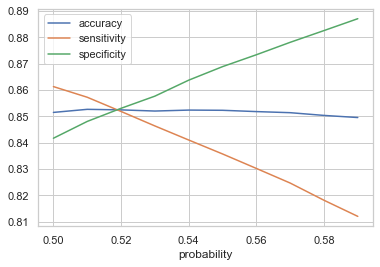

In [471]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [472]:
y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,final_churn_pred
0,0,0.08,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.46,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.25,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.47,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.54,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0,0,0,0,1


In [473]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

The overall accuracy of the model now is: 0.8524730402322688


In [474]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

[[16454  2834]
 [ 2857 16431]]


In [475]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8518768145997512
Specificity =  0.8530692658647864
False Positive Rate =  0.1469307341352136
Precision =  0.852893848948871
True Negative Prediction Rate =  0.8520532339081353


In [476]:
from sklearn.metrics import precision_recall_curve

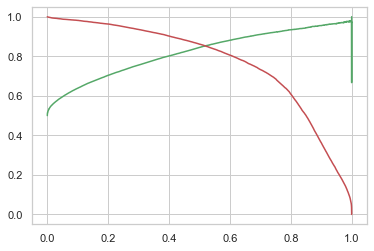

In [477]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

##### Making Predictions on the test set

In [478]:
# Scaling the test data
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
35865,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.02,0.05,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.00,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.06,0,0,0,1,0,0,1,0,0,0
41952,0.05,0.01,0.01,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.01,0.02,0.01,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.03,0.05,0.02,0.00,0.01,...,0.01,0.00,0.01,0.04,0.02,0.05,0.04,0.03,0.05,0.02,0.01,0.02,0.10,0.09,0.09,0.04,0.00,0.00,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.07,0.06,0.03,0.00,0.00,0.02,0.06,0.00,0.01,0.01,0.00,0.08,1,0,0,1,0,0,0,0,1,0
98938,0.06,0.00,0.04,0.01,0.01,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.01,0.02,0.05,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.07,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.02,0.02,0.03,0.05,0.06,0.24,...,0.00,0.00,0.02,0.08,0.04,0.06,0.06,0.06,0.06,0.01,0.03,0.04,0.16,0.16,0.16,0.12,0.01,0.03,0.06,0.04,0.03,0.05,0.00,0.00,0.00,0.00,0.00,0.14,0.07,0.12,0.00,0.00,0.00,0.21,0.09,0.07,0.02,0.02,0.02,0.10,1,0,0,1,0,0,0,0,0,0
29459,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.01,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.03,0.07,0.03,0.04,0.04,0.03,0.04,0.00,0.03,0.05,0.12,0.12,0.10,0.06,0.00,0.00,0.01,0.04,0.05,0.03,0.25,0.00,0.20,0.00,0.06,0.07,0.07,0.00,0.00,0.00,0.00,0.07,0.05,0.03,0.01,0.02,0.01,0.07,1,0,0,1,0,0,1,0,0,0
70682,0.10,0.01,0.01,0.04,0.08,0.24,0.14,0.00,0.00,0.00,0.00,0.11,0.03,0.00,0.01,0.00,0.01,0.06,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.08,0.00,0.00,0.00,0.08,0.17,0.14,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.07,0.20,0.16,0.00,0.01,0.01,0.03,0.11,...,0.00,0.00,0.02,0.11,0.06,0.03,0.03,0.03,0.03,0.00,0.03,0.02,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [479]:
# Feature selection
X_test=X_test[rfe_columns_2]
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_mou_8,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_7,isd_og_mou_6,og_others_6,total_og_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_8,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_7,total_rech_num_7,total_rech_num_8,max_rech_amt_7,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_7,sachet_3g_6,sachet_3g_7,aug_vbc_3g,avg_arpu_6_7,total_rech_data_group_8_10-25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges
35865,0.03,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.05,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.06,0,1,0,0
41952,0.05,0.01,0.01,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.02,0.01,0.01,0.02,0.04,0.00,0.00,0.00,0.02,0.01,0.00,0.01,0.04,0.02,0.04,0.02,0.01,0.02,0.10,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.03,0.00,0.02,0.08,0,1,0,0
98938,0.06,0.00,0.04,0.01,0.03,0.02,0.00,0.00,0.00,0.00,0.01,0.07,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.02,0.06,0.24,0.00,0.06,0.18,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.08,0.04,0.06,0.01,0.03,0.04,0.16,0.12,0.01,0.03,0.06,0.00,0.00,0.00,0.07,0.00,0.00,0.21,0.10,0,1,0,0
29459,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.07,0.03,0.04,0.00,0.03,0.05,0.12,0.06,0.00,0.00,0.01,0.25,0.00,0.20,0.07,0.00,0.00,0.07,0.07,0,1,0,0
70682,0.10,0.01,0.01,0.04,0.24,0.14,0.00,0.00,0.11,0.03,0.00,0.04,0.00,0.00,0.00,0.02,0.00,0.00,0.17,0.00,0.00,0.16,0.03,0.11,0.00,0.02,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.11,0.06,0.03,0.00,0.03,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0,0,1,0


In [480]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

In [481]:
y_test_pred = res.predict(X_test_SM)
print("\n The first ten probability value of the prediction are:\n",y_test_pred[:10])


 The first ten probability value of the prediction are:
 35865                   0.75
41952                   0.51
98938                   0.00
29459                   0.12
70682                   0.03
58317                   0.19
4860                    0.00
16890                   0.87
61329                   0.52
94332                   0.58
dtype: float64


In [482]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
35865,0.75
41952,0.51
98938,0.00
29459,0.12
70682,0.03


In [483]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [484]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
35865,0
41952,0
98938,0
29459,0
70682,0


In [485]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn,Conv_prob
35865,0,0.75
41952,0,0.51
98938,0,0.00
29459,0,0.12
70682,0,0.03


In [486]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

,churn,Conv_prob,test_churn_pred
35865,0,0.75,1
41952,0,0.51,0
98938,0,0.00,0
29459,0,0.12,0
70682,0,0.03,0


In [487]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

0.8527941339851127

In [488]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

Confusion Matrix
 [[7093 1179]
 [ 146  583]]


In [489]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [490]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.7997256515775034
Specificity =  0.8574709864603481
False Positive Rate =  0.14252901353965183
Precision =  0.33087400681044266
True Negative Prediction Rate =  0.9798314684348667


In [491]:
print("The accuracy of the predicted model is: ",round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  85.0 %
The sensitivity of the predicted model is:  80.0 %

As the model created is based on a sensitivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



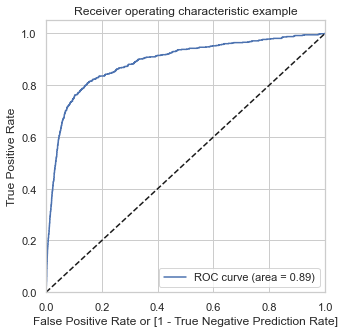

In [492]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

### Logistic Regression using PCA

In [493]:
# split the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

# apply scaling on the dataset

scaler = MinMaxScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

# Applying SMOTE technique for data imbalance correction

sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

X_train_sm.head()

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)
Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,...,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_6_7,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,tenure_range_6-12 Months,tenure_range_1-2 Yrs,tenure_range_2-5 Yrs,tenure_range_5 Yrs and above
0,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,...,0.00,0.00,0.01,0.05,0.02,0.04,0.04,0.03,0.04,0.04,0.03,0.02,0.10,0.10,0.10,0.04,0.00,0.03,0.02,0.00,0.00,0.00,0.25,0.25,0.20,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.06,1,0,0,1,0,0,0,0,0,0
1,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.04,0.02,...,0.00,0.00,0.06,0.11,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.11,0.02,0.02,0.02,0.03,0.06,0.05,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.17,0.08,0.00,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.07,1,0,0,1,0,0,0,0,1,0
2,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.04,0.03,...,0.00,0.00,0.06,0.11,0.06,0.01,0.04,0.00,0.00,0.04,0.00,0.04,0.02,0.10,0.01,0.01,0.07,0.09,0.05,0.00,0.00,0.00,0.00,0.50,0.00,0.26,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.03,0.02,0.07,1,0,0,0,1,0,1,0,0,0
3,0.08,0.16,0.11,0.05,0.14,0.18,0.05,0.00,0.03,0.00,0.00,0.38,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.14,0.00,0.00,0.00,0.27,0.16,0.08,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.23,0.16,0.09,0.01,0.00,0.01,0.01,0.01,...,0.00,0.00,0.02,0.07,0.03,0.14,0.08,0.09,0.14,0.08,0.09,0.02,0.00,0.16,0.16,0.06,0.00,0.09,0.00,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.06,0.00,0.00,0.00,0.01,0.21,0.00,0.01,0.04,0.02,0.15,1,0,0,1,0,0,0,0,1,0
4,0.04,0.08,0.05,0.00,0.06,0.05,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.02,0.00,0.06,0.09,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.07,0.01,0.02,0.02,0.00,0.00,0.07,0.03,0.00,0.00,0.03,0.03,0.01,0.07,0.00,0.00,0.10,0.08,0.01,0.00,0.00,0.00,0.04,0.11,...,0.00,0.00,0.06,0.12,0.06,0.02,0.03,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.09,0

In [494]:
# importing PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

# applying PCA on train data
pca.fit(X_train_sm)

PCA(random_state=42)

In [495]:
X_train_sm_pca=pca.fit_transform(X_train_sm)
print("Dimension of X_train_sm_pca: ",X_train_sm_pca.shape)

X_test_pca=pca.transform(X_test)
print("Dimension of X_test_pca: ",X_test_pca.shape)

Dimension of X_train_sm_pca:  (38576, 126)
Dimension of X_test_pca:  (9001, 126)


In [496]:
#Viewing the PCA components
pca.components_

array([[ 1.77080250e-02,  5.62945551e-03,  1.28071557e-02, ...,
        -8.33377373e-02,  2.03169293e-01, -2.25884463e-04],
       [ 1.17884332e-03,  1.36226801e-04,  2.66567649e-03, ...,
         6.62002105e-01, -7.17541378e-01,  1.93966990e-04],
       [ 8.31908962e-03, -2.32698646e-02, -1.53378013e-02, ...,
         7.54642802e-02,  5.50287343e-02,  1.26734621e-03],
       ...,
       [-3.94307290e-07,  1.32661563e-06, -2.21287988e-06, ...,
        -3.76725866e-08, -1.42403279e-08,  2.74517956e-08],
       [ 2.29473384e-07, -1.88640723e-06,  1.53383133e-06, ...,
        -3.64244932e-08, -2.71775061e-08, -3.24942342e-08],
       [ 0.00000000e+00, -5.65249249e-17, -2.03134914e-16, ...,
        -5.76018731e-19,  2.97456566e-18, -2.29746360e-17]])

In [497]:
#### Performing Logistic Regression

In [498]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression()
logreg_pca.fit(X_train_sm_pca, y_train_sm)

# making the predictions
y_pred = logreg_pca.predict(X_test_pca)

# converting the prediction into a dataframe
y_pred_df = pd.DataFrame(y_pred)
print("Dimension of y_pred_df:", y_pred_df.shape)

Dimension of y_pred_df: (9001, 1)


In [499]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred))

Confusion Matirx for y_test & y_pred
 [[6759 1513]
 [ 127  602]] 

Accuracy of the logistic regression model with PCA:  0.8177980224419509


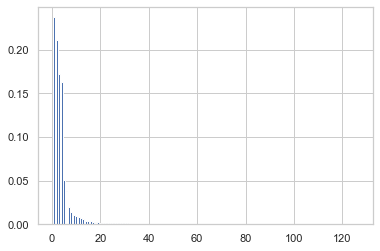

In [500]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.show()

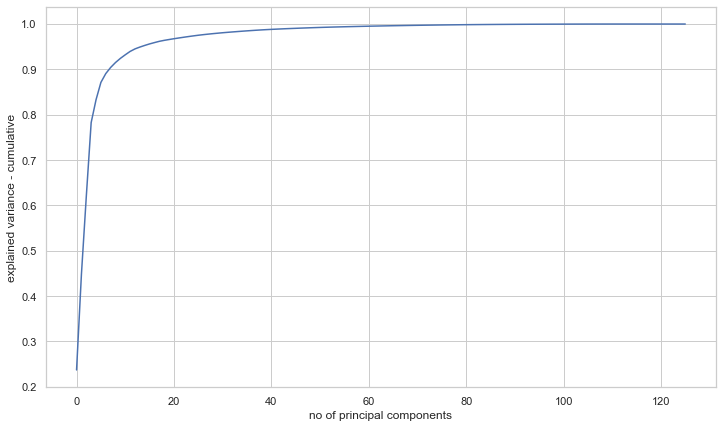

In [501]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Making a scree plot
fig = plt.figure(figsize=[12,7])
plt.plot(var_cumu)
plt.xlabel('no of principal components')
plt.ylabel('explained variance - cumulative')
plt.show()

In [502]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([23.7, 44.8, 62. , 78.3, 83.3, 87.1, 89. , 90.4, 91.5, 92.4, 93.2,
       93.9, 94.5, 94.9, 95.3, 95.6, 95.9, 96.2, 96.4, 96.6, 96.8, 97. ,
       97.2, 97.4, 97.5, 97.6, 97.7, 97.8, 97.9, 98. , 98.1, 98.2, 98.3,
       98.4, 98.5, 98.6, 98.7, 98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3, 99.3,
       99.3, 99.3, 99.3, 99.3, 99.3])

##### **90% of the data can be explained with 8 PCA components*

##### **Fitting the dataset with the 8 explainable components**

In [503]:
pca_8 = PCA(n_components=15)

train_pca_8 = pca_8.fit_transform(X_train_sm)
print("Dimension for Train dataset using PCA: ", train_pca_8.shape)

test_pca_8 = pca_8.transform(X_test)
print("Dimension for Test dataset using PCA: ", test_pca_8.shape)

Dimension for Train dataset using PCA:  (38576, 15)
Dimension for Test dataset using PCA:  (9001, 15)


In [504]:
logreg_pca_8 = LogisticRegression()
logreg_pca_8.fit(train_pca_8, y_train_sm)

# making the predictions
y_pred_8 = logreg_pca_8.predict(test_pca_8)

# converting the prediction into a dataframe
y_pred_df_8 = pd.DataFrame(y_pred_8)
print("Dimension of y_pred_df_8: ", y_pred_df_8.shape)

Dimension of y_pred_df_8:  (9001, 1)


In [505]:
# Checking the Confusion matrix
print("Confusion Matirx for y_test & y_pred\n",confusion_matrix(y_test,y_pred_8),"\n")

# Checking the Accuracy of the Predicted model.
print("Accuracy of the logistic regression model with PCA: ",accuracy_score(y_test,y_pred_8))

Confusion Matirx for y_test & y_pred
 [[6248 2024]
 [ 185  544]] 

Accuracy of the logistic regression model with PCA:  0.7545828241306521
